<a href="https://colab.research.google.com/github/suni21/Screening_project/blob/main/screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [73]:
!wget https://raw.githubusercontent.com/suni21/Screening_project/main/Thermal_screeing.png?token=ATZWPZ56T5ATLFBYG4RCRFTAU7ZMI

--2021-05-21 17:49:11--  https://raw.githubusercontent.com/suni21/Screening_project/main/Thermal_screeing.png?token=ATZWPZ56T5ATLFBYG4RCRFTAU7ZMI
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42934 (42K) [image/png]
Saving to: ‘Thermal_screeing.png?token=ATZWPZ56T5ATLFBYG4RCRFTAU7ZMI’

Thermal_screeing.pn 100%[===================>]  41.93K  --.-KB/s    in 0.01s   

2021-05-21 17:49:11 (3.97 MB/s) - ‘Thermal_screeing.png?token=ATZWPZ56T5ATLFBYG4RCRFTAU7ZMI’ saved [42934/42934]



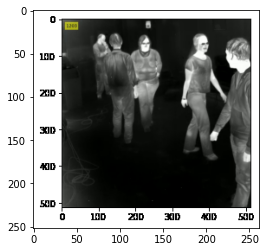

In [77]:
image = read_image("/content/Thermal_screeing.png?token=ATZWPZ56T5ATLFBYG4RCRFTAU7ZMI")   
plt.imshow(image)

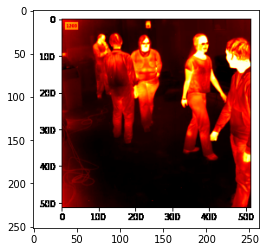

In [78]:
heatmap_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
heatmap=cv2.applyColorMap(heatmap_gray,cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap,cv2.COLOR_BGR2RGB)
plt.imshow(heatmap)
# plt.imsave("Output","2_hot_colormap.png"),heatmap,cmap="gray"

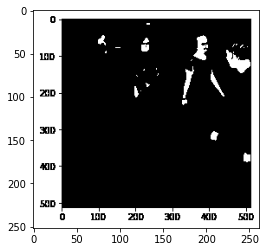

In [79]:
heatmap_gray = cv2.cvtColor(heatmap,cv2.COLOR_RGB2GRAY)
ret,binary_thresh = cv2.threshold(heatmap_gray,200,255,cv2.THRESH_BINARY)
plt.imshow(binary_thresh,cmap="gray")

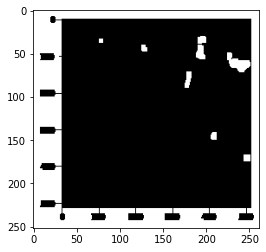

In [80]:
kernal = np.ones((5,5),np.uint8)
image_erosion = cv2.erode(binary_thresh,kernal,iterations=1)
image_dilation = cv2.dilate(image_erosion,kernal,iterations=1)
plt.imshow(image_dilation,cmap="gray")

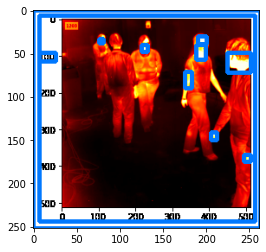

In [81]:
contours,_ = cv2.findContours(image_dilation,1,2)
image_rect = np.copy(heatmap)

for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  image_rect = cv2.rectangle(image_rect,(x,y),(x+w,y+h),(0,120,255),3)
plt.imshow(image_rect)